Загрузка данных в среду

In [ ]:
!wget https://raw.githubusercontent.com/al-filippov/ai/main/1/data.csv -O data.csv

Чтение данных и формирование DataFrame

In [19]:
import pandas as pd
df = pd.read_csv('data.csv')
print(df)
num_records = df.shape[0]
print(num_records)

     Unnamed: 0    Height     Weight
0             0  167.0812  51.242630
1             1  181.6608  61.900227
2             2  176.2760  69.401361
3             3  173.2788  64.553288
4             4  172.1866  65.442177
..          ...       ...        ...
195         195  167.1320  54.802721
196         196  167.9194  52.507937
197         197  173.3296  58.185941
198         198  172.7708  57.809524
199         199  181.3306  57.995465

[200 rows x 3 columns]
200


Обучение модели линейной регрессии

In [23]:
from sklearn import linear_model
x = df['Height'].values.reshape(num_records, 1)
y = df['Weight'].values.reshape(num_records, 1)
model = linear_model.LinearRegression()
_ = model.fit(x,y)
print(f'w = {str(model.intercept_[0])} + {str(model.coef_.T[0][0])} x')

w = -48.08512764117068 + 0.6129012675686305 x


В среднем на каждый килограмм приходится 0,6 см роста.

Оценка ошибки работы модели

In [24]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(x)
mae = mean_absolute_error(y, y_pred)
print(mae)

3.518701759813252


В среднем предсказание отстает от фактического значения на 3,5 кг.

Text(0, 0.5, 'Вес, кг')

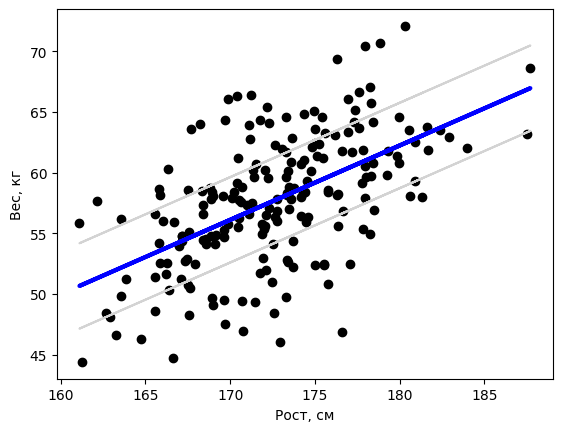

In [26]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.plot(x, y_pred + mae, color='lightgray')
plt.plot(x, y_pred - mae, color='lightgray')
plt.xlabel('Рост, см')
plt.ylabel('Вес, кг')

Определение линейной зависимости (линейная корреляция)

In [29]:
from scipy.stats import pearsonr
corr, pval = pearsonr(x[:,0], y[:,0])
print(corr)
print(pval)
print(pval < 0.05)

0.5568647346122994
1.1029015151265851e-17
True


corr > 0, значит обнаружена линейная зависимость между x и y

corr -> 1, присутствует сильная корреляция

pval < 5%, значит корреляция присутствует
